In [ ]:
import numpy as np
import os

os.chdir('/Users/ima029/Library/CloudStorage/OneDrive-UiTOffice365/Arkiverte prosjekter/Emner ved UiT/FYS-3033 Deep Learning/DL home exam')

from src.problem2.DataLoaders.camvid_loader import load_camvid

import tensorflow as tf

In [44]:


x_tr, y_tr, x_te, y_te, _ = load_camvid('/Users/ima029/Library/CloudStorage/OneDrive-UiTOffice365/Arkiverte prosjekter/Emner ved UiT/FYS-3033 Deep Learning/DL home exam/Problem 2/data/')

x_tr = tf.image.resize(np.moveaxis(x_tr, 1, -1), (184, 240))
y_tr = tf.math.round(tf.image.resize(np.moveaxis(y_tr, 1, -1), (184, 240)))
x_te = tf.image.resize(np.moveaxis(x_te, 1, -1), (184, 240))
y_te = tf.math.round(tf.image.resize(np.moveaxis(y_te, 1, -1), (184, 240)))

num_classes = len(np.unique(y_tr))


In [45]:
inputs = tf.keras.layers.Input(shape=x_tr.shape[1:])

x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
concat3 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(concat3)

x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
concat2 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(concat2)

x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
concat1 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(concat1)

x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Concatenate()([concat1, x])

x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Concatenate()([concat2, x])

x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Concatenate()([concat3, x])

x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(num_classes, 1)(x)
output = tf.keras.layers.Softmax()(x)

model = tf.keras.Model(inputs, output)

In [63]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy())
model.fit(x_tr, y_tr, batch_size=32, epochs=100)


Epoch 1/100


2022-06-13 15:55:31.441605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 8s 429ms/step - loss: 0.7953
Epoch 2/100
15/15 [==============================] - 6s 386ms/step - loss: 0.6978
Epoch 3/100
15/15 [==============================] - 6s 431ms/step - loss: 0.6479
Epoch 4/100
15/15 [==============================] - 6s 387ms/step - loss: 0.6212
Epoch 5/100
15/15 [==============================] - 6s 381ms/step - loss: 0.5977
Epoch 6/100
15/15 [==============================] - 6s 381ms/step - loss: 0.6004
Epoch 7/100
15/15 [==============================] - 6s 382ms/step - loss: 0.6100
Epoch 8/100
15/15 [==============================] - 6s 384ms/step - loss: 0.5772
Epoch 9/100
15/15 [==============================] - 6s 384ms/step - loss: 0.5513
Epoch 10/100
15/15 [==============================] - 6s 382ms/step - loss: 0.5438
Epoch 11/100
15/15 [==============================] - 6s 382ms/step - loss: 0.5281
Epoch 12/100
15/15 [==============================] - 6s 380ms/step - loss: 0.5114
Epoch 13/100
15/15 [=====

In [64]:
model.evaluate(x_te, y_te)

2022-06-13 17:13:33.706158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 142ms/step - loss: 0.6186


0.6185869574546814

2022-06-13 17:13:41.270613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


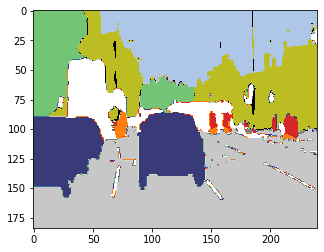

In [65]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap as lcm



colors = np.zeros((12, 3))

colors[(0, 1, 3, 4, 9, 10), :] = np.array(
    cm.get_cmap('tab20').colors)[(1, 16, 15, 14, 6, 2), :]
colors[2, :] = np.zeros(3)
colors[11, :] = np.ones(3)
colors[5:8, :] = np.array(cm.get_cmap('tab20c').colors)[9:12, :]
colors[8, :] = np.array(cm.get_cmap('tab20b').colors)[0, :]
colors[6, :] = np.array(cm.get_cmap('Accent').colors)[4, :]

custom_cm = lcm(colors)

plt.imshow(tf.argmax(model.predict(x_tr)[1], axis=2) / (num_classes - 1), cmap = custom_cm)